# Testing Spatial Interpolation on Fardikot City in Dataset
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib notebook

## Data Loading and Cleaning
---

In [3]:
df = pd.read_csv('../uranium2.csv')
df.head()

,Year,State,District,Block/Taluka,Location/Site/Village,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,Punjab,Amritsar,NaN,Jagdev Khurd (Dalla),31.9070,74.7391,7.58,1233.0,0.0,...,380.0,96.0,34.0,65.0,14.00,NaN,NaN,1.11,35.90,0.57
1,2023,Punjab,Amritsar,NaN,Laungo Mahal,31.9059,74.8189,7.96,683.0,0.0,...,200.0,40.0,24.0,87.0,6.00,NaN,NaN,0.04,54.06,3.77
2,2023,Punjab,Amritsar,NaN,Makowal,31.9046,74.8904,8.20,412.0,0.0,...,180.0,32.0,24.0,21.0,7.00,NaN,NaN,0.05,44.44,3.04
3,2023,Punjab,Amritsar,NaN,Malakpur,31.9534,74.8453,8.20,442.0,0.0,...,170.0,32.0,22.0,20.0,5.00,NaN,NaN,1.76,35.85,1.04
4,2023,Punjab,Amritsar,NaN,Ramdas,31.9667,74.9111,8.10,373.0,0.0,...,110.0,24.0,12.0,47.0,4.00,NaN,NaN,0.05,36.31,0.11


In [4]:
df_farid = df[df['District'] == 'Faridkot'].reset_index(drop=True)
df_farid = df_farid.sort_values(by='Year', ascending=False)
df_farid.head()

,Year,State,District,Block/Taluka,Location/Site/Village,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,Punjab,Faridkot,NaN,Bir Chahal,30.6557,74.8166,8.49,1943.0,48.0,...,380.0,24.0,78.0,297.0,11.00,NaN,NaN,0.02,1.90,156.70
1,2023,Punjab,Faridkot,NaN,Chand Baja,30.7390,74.8620,7.91,2316.0,0.0,...,360.0,28.0,71.0,319.0,163.00,NaN,NaN,0.18,1.30,12.00
2,2023,Punjab,Faridkot,NaN,Daggo Romana,30.6057,74.6965,7.94,159.0,0.0,...,70.0,8.0,12.0,9.0,3.00,NaN,NaN,0.22,3.30,1.45
3,2023,Punjab,Faridkot,NaN,Dalsinghwala,30.2713,74.5536,8.27,1724.0,0.0,...,400.0,60.0,61.0,205.0,13.00,NaN,NaN,-0.02,0.80,28.40
4,2023,Punjab,Faridkot,NaN,Deep Singh Wala,30.7389,74.4792,7.89,2378.0,0.0,...,280.0,28.0,51.0,471.0,13.00,NaN,NaN,0.04,1.72,21.47


### Data Cleaning

In [5]:
obj_cols = df_farid.select_dtypes(include=["object"])
print(obj_cols.columns)

Index(['State', 'District', 'Block/Taluka', 'Location/Site/Village', 'pH',
       'F (mg/L)', 'SO4 (mg/L)', 'NO3 (mg/L)', 'PO4 (mg/L)', 'K (mg/L)',
       'SiO2'],
      dtype='object')


In [6]:
# Removing location-specific cols
obj_to_num = obj_cols.iloc[:, 4:]
obj_to_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pH          118 non-null    object
 1   F (mg/L)    118 non-null    object
 2   SO4 (mg/L)  118 non-null    object
 3   NO3 (mg/L)  118 non-null    object
 4   PO4 (mg/L)  118 non-null    object
 5   K (mg/L)    118 non-null    object
 6   SiO2        44 non-null     object
dtypes: object(7)
memory usage: 6.6+ KB


In [7]:
# Seeing why: this gives a list of  all unique non-float types for all columns
def find_non_numeric_values(df):
    data_list = []

    for col in obj_to_num.columns:
        non_numeric_counts = df[col][pd.to_numeric(df[col], errors="coerce").isna()].value_counts()
        for value, count in non_numeric_counts.items():
            data_list.append({'Col': col, 'Non-numeric value': value, 'Count': count})
    return pd.DataFrame(data_list)

In [8]:
_result_df_1 = find_non_numeric_values(df_farid)
_result_df_1

,Col,Non-numeric value,Count
0,PO4 (mg/L),<0.10,21


In [9]:
# Removing "<" from the strings
_df_clean1 = df_farid.replace({"<0.10": 0.10})
_result_df_2 = find_non_numeric_values(_df_clean1)
_result_df_2

""


In [10]:
# Final formatting for dtype
_df_clean2 = _df_clean1.copy()
_df_clean2[obj_to_num.columns] = _df_clean2[obj_to_num.columns].astype(float)
_df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   118 non-null    int64  
 1   State                  118 non-null    object 
 2   District               118 non-null    object 
 3   Block/Taluka           83 non-null     object 
 4   Location/Site/Village  118 non-null    object 
 5   Latitude               118 non-null    float64
 6   Longitude              118 non-null    float64
 7   pH                     118 non-null    float64
 8   EC (µS/cm)             118 non-null    float64
 9   CO3 (mg/L)             118 non-null    float64
 10  HCO3 (mg/L)            118 non-null    float64
 11  Cl (mg/L)              118 non-null    float64
 12  F (mg/L)               118 non-null    float64
 13  SO4 (mg/L)             118 non-null    float64
 14  NO3 (mg/L)             118 non-null    float64
 15  PO4 (m

### Cleaning Null Values

In [11]:
_df_clean2.isna().any()

Year                     False
State                    False
District                 False
Block/Taluka              True
Location/Site/Village    False
Latitude                 False
Longitude                False
pH                       False
EC (µS/cm)               False
CO3 (mg/L)               False
HCO3 (mg/L)              False
Cl (mg/L)                False
F (mg/L)                 False
SO4 (mg/L)               False
NO3 (mg/L)               False
PO4 (mg/L)               False
Total Hardness           False
Ca (mg/L)                False
Mg (mg/L)                False
Na (mg/L)                False
K (mg/L)                 False
SiO2                      True
TDS                       True
Fe (ppm)                  True
As (ppb)                  True
U (ppb)                   True
dtype: bool

In [12]:
# Dropping rows with NaN in 'U (ppb)', 'Latitude', 'Longitude'
_df_clean3 = _df_clean2.dropna(subset=['U (ppb)', 'Latitude', 'Longitude'])
_df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 34
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   34 non-null     int64  
 1   State                  34 non-null     object 
 2   District               34 non-null     object 
 3   Block/Taluka           0 non-null      object 
 4   Location/Site/Village  34 non-null     object 
 5   Latitude               34 non-null     float64
 6   Longitude              34 non-null     float64
 7   pH                     34 non-null     float64
 8   EC (µS/cm)             34 non-null     float64
 9   CO3 (mg/L)             34 non-null     float64
 10  HCO3 (mg/L)            34 non-null     float64
 11  Cl (mg/L)              34 non-null     float64
 12  F (mg/L)               34 non-null     float64
 13  SO4 (mg/L)             34 non-null     float64
 14  NO3 (mg/L)             34 non-null     float64
 15  PO4 (mg/L)   

### Final dataset

In [13]:
# Final cleaned dataset
df_clean = _df_clean3.copy(deep=True)
df_clean.head()

,Year,State,District,Block/Taluka,Location/Site/Village,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,Punjab,Faridkot,NaN,Bir Chahal,30.6557,74.8166,8.49,1943.0,48.0,...,380.0,24.0,78.0,297.0,11.0,NaN,NaN,0.02,1.90,156.70
1,2023,Punjab,Faridkot,NaN,Chand Baja,30.7390,74.8620,7.91,2316.0,0.0,...,360.0,28.0,71.0,319.0,163.0,NaN,NaN,0.18,1.30,12.00
2,2023,Punjab,Faridkot,NaN,Daggo Romana,30.6057,74.6965,7.94,159.0,0.0,...,70.0,8.0,12.0,9.0,3.0,NaN,NaN,0.22,3.30,1.45
3,2023,Punjab,Faridkot,NaN,Dalsinghwala,30.2713,74.5536,8.27,1724.0,0.0,...,400.0,60.0,61.0,205.0,13.0,NaN,NaN,-0.02,0.80,28.40
4,2023,Punjab,Faridkot,NaN,Deep Singh Wala,30.7389,74.4792,7.89,2378.0,0.0,...,280.0,28.0,51.0,471.0,13.0,NaN,NaN,0.04,1.72,21.47


## [Analysing Spatial Variography](https://scikit-gstat.readthedocs.io/en/latest/userguide/variogram.html#variogram-models)
---

We are analysing the change in uranium concentration with respect to distance between sample points in Faridkot district of Punjab to test if spatial interpolation techniques can be applied to estimate uranium concentration in unsampled locations.

In [62]:
import skgstat as skg
from scipy.spatial.distance import pdist

### Initial Variogram

In [15]:
# Coordinates array
coords = df_clean[['Longitude', 'Latitude']].to_numpy()

# Uranium values
uranium = df_clean['U (ppb)'].dropna().to_numpy()

<IPython.core.display.Javascript object>

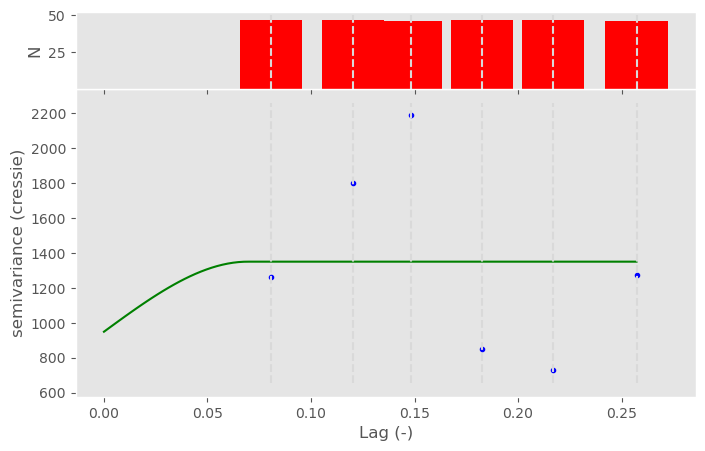

In [73]:
V = skg.Variogram(
	coords,
	uranium,
	normalize=False,
	maxlag="median",
	n_lags=6,
	bin_func="uniform",
	estimator="cressie",		# More ROBUST estimator
	use_nugget=True,
	model="spherical",
)
V.plot()

<IPython.core.display.Javascript object>

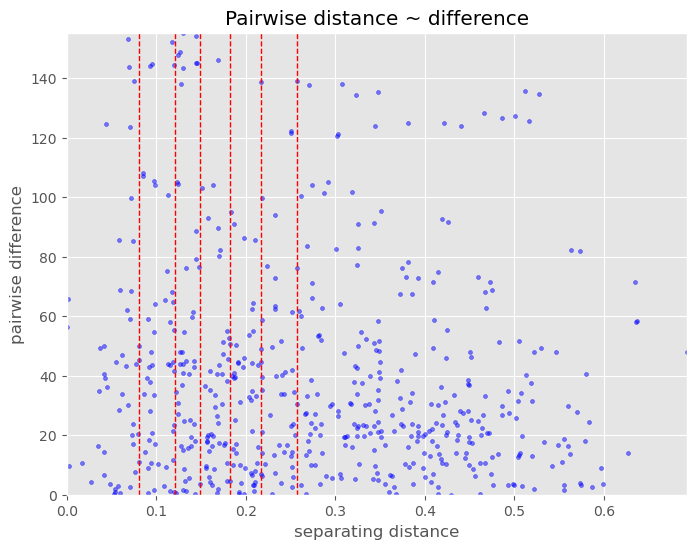

In [60]:
V.distance_difference_plot()

In [78]:
from skgstat import OrdinaryKriging
ok = OrdinaryKriging(V, min_points=5, max_points=10, mode='exact')

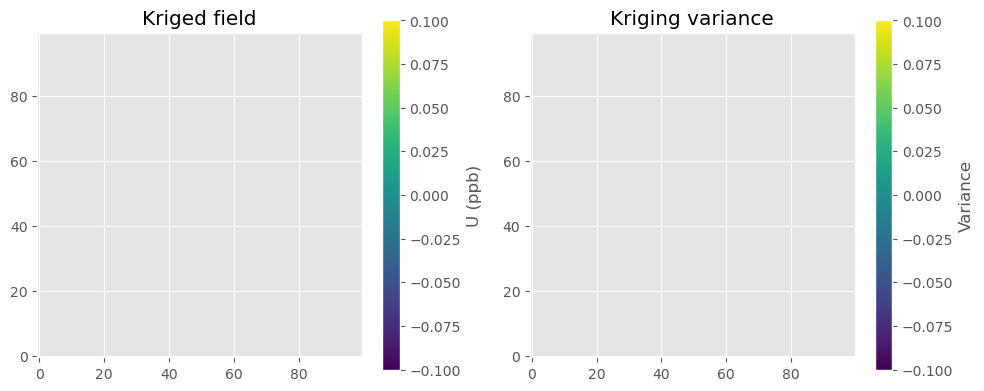

In [79]:
%matplotlib inline
xx, yy = np.mgrid[0:99:100j, 0:99:100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Kriged field")
plt.imshow(field.T, origin="lower")
plt.colorbar(label="U (ppb)")
plt.subplot(1, 2, 2)
plt.title("Kriging variance")
plt.imshow(s2.T, origin="lower")
plt.colorbar(label="Variance")
plt.tight_layout()
plt.show()